## Observations and Insights 

In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# remove duplicate time points of study results
clean_study_results=study_results.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [132]:
# Combine the data into a single dataset
Merge_mouse_data=pd.merge(mouse_metadata,clean_study_results,on="Mouse ID")
Merge_mouse_data


# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_mouse_data=Merge_mouse_data.groupby(['Drug Regimen', 'Timepoint'])

mean=grouped_mouse_data["Tumor Volume (mm3)"].mean()
mean


Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            44.266086
              10           43.084291
              15           42.064317
              20           40.716325
                             ...    
Zoniferol     25           55.432935
              30           57.713531
              35           60.089372
              40           62.916692
              45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [134]:
median=grouped_mouse_data["Tumor Volume (mm3)"].median()
median

Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            45.597064
              10           43.421014
              15           42.798160
              20           40.716428
                             ...    
Zoniferol     25           55.676604
              30           57.419744
              35           60.365832
              40           62.274543
              45           65.684689
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [135]:
standard_deviation=grouped_mouse_data["Tumor Volume (mm3)"].std()
standard_deviation

Drug Regimen  Timepoint
Capomulin     0            0.000000
              5            2.242964
              10           3.513422
              15           4.108369
              20           4.362915
                             ...   
Zoniferol     25           2.410052
              30           3.098552
              35           3.297993
              40           3.736102
              45           3.755037
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [136]:
variance=grouped_mouse_data["Tumor Volume (mm3)"].var()
variance

Drug Regimen  Timepoint
Capomulin     0             0.000000
              5             5.030889
              10           12.344133
              15           16.878693
              20           19.035028
                             ...    
Zoniferol     25            5.808348
              30            9.601024
              35           10.876760
              40           13.958456
              45           14.100301
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [137]:
SEM=grouped_mouse_data["Tumor Volume (mm3)"].sem()
SEM

Drug Regimen  Timepoint
Capomulin     0            0.000000
              5            0.448593
              10           0.702684
              15           0.838617
              20           0.909731
                             ...   
Zoniferol     25           0.602513
              30           0.800043
              35           0.881426
              40           0.998515
              45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics=pd.DataFrame({"mean":mean,"median":median,"variance":variance,"standard deviation":standard_deviation,"SEM":SEM})
summary_statistics            



mean     median   variance  standard deviation  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000            0.000000   
             5          44.266086  45.597064   5.030889            2.242964   
             10         43.084291  43.421014  12.344133            3.513422   
             15         42.064317  42.798160  16.878693            4.108369   
             20         40.716325  40.716428  19.035028            4.362915   
...                           ...        ...        ...                 ...   
Zoniferol    25         55.432935  55.676604   5.808348            2.410052   
             30         57.713531  57.419744   9.601024            3.098552   
             35         60.089372  60.365832  10.876760            3.297993   
             40         62.916692  62.274543  13.958456            3.736102   
             45         65.960888  65.684689  14.100301            3.755037   

                             SEM  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

In [139]:
# Using the aggregation method, produce the same summary statistics in a single line
grouped_mouse_data.agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                  \
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of measurements by drug regimen')

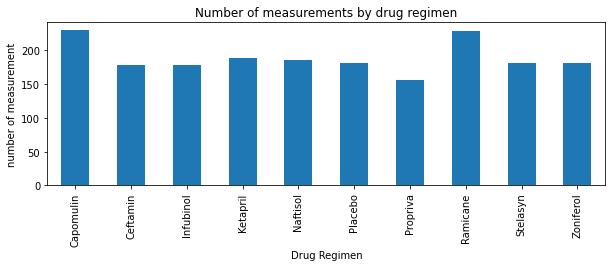

In [140]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurement=Merge_mouse_data.groupby(['Drug Regimen']).count().rename(columns={"Mouse ID": "measurements"})
drug_measurement=measurement["measurements"]
measurement_chart=drug_measurement.plot(kind="bar",figsize=(10,3))
measurement_chart.set_ylabel("number of measurement")
measurement_chart.set_title("Number of measurements by drug regimen")


In [141]:
drug_measurement=measurement["measurements"]
drug_measurement

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: measurements, dtype: int64

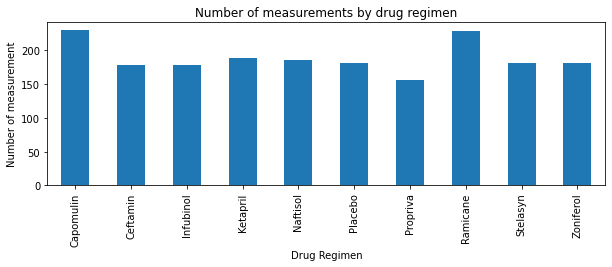

In [142]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create a bar chart based off of the group series from above
measurement_chart=drug_measurement.plot(kind='bar',figsize=(10,3), title=("Number of measurements by drug regimen"))

# Set the xlabel and ylabel using class methods
measurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Number of measurement")


plt.show()


Text(0.5, 1.0, 'Sex Contribution')

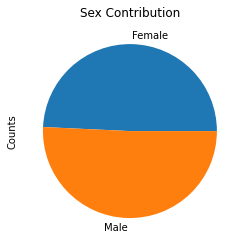

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Split up our data into groups based upon 'gender'
# Find out how many of each gender in the drugs study
gender_groups = Merge_mouse_data.groupby('Sex').count().rename(columns={"Mouse ID": "Counts"})


gender_study = gender_groups["Counts"]

gender_study

gender_study_chart=gender_study.plot(kind='pie')


gender_study_chart.set_title("Sex Contribution")
# Chart our data, give it a title, and label the axes
#gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
#gender_chart.set_xlabel("Gender")
#gender_chart.set_ylabel("Number of Trips Taken")

#plt.show()
#plt.tight_layout()


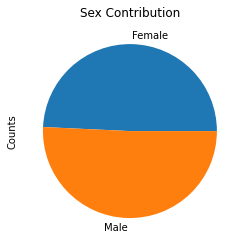

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_study_pychart=gender_study.plot.pie(y="Counts",title="Sex Contribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

idx = Merge_mouse_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].transform(max) == Merge_mouse_data['Timepoint']
final_timepoint = Merge_mouse_data[idx]
study_timepoint = final_timepoint[final_timepoint['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
study_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1792,x822,Ceftamin,Male,3,29,45,61.386660,3
1808,y163,Infubinol,Female,17,27,45,67.685569,3
1840,y769,Ceftamin,Female,6,27,45,68.594745,4
1850,y865,Ceftamin,Male,23,26,45,64.729837,3


In [146]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = study_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_subset = study_timepoint[study_timepoint['Drug Regimen'] == drug]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    print(drug_subset[(lower_bound >= study_timepoint['Tumor Volume (mm3)']) | (upper_bound <= study_timepoint['Tumor Volume (mm3)'])].count())

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64
Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64
Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64
Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64


<ipython-input-146-fb21bb307d86>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(drug_subset[(lower_bound >= study_timepoint['Tumor Volume (mm3)']) | (upper_bound <= study_timepoint['Tumor Volume (mm3)'])].count())
<ipython-input-146-fb21bb307d86>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(drug_subset[(lower_bound >= study_timepoint['Tumor Volume (mm3)']) | (upper_bound <= study_timepoint['Tumor Volume (mm3)'])].count())
<ipython-input-146-fb21bb307d86>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(drug_subset[(lower_bound >= study_timepoint['Tumor Volume (mm3)']) | (upper_bound <= study_timepoint['Tumor Volume (mm3)'])].count())
<ipython-input-146-fb21bb307d86>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(drug_subset[(lower_bound >= study_timepoint['Tumor Volume (mm3)']) | (upper_bound <= study_timepoint['Tumor Volume

No outliers

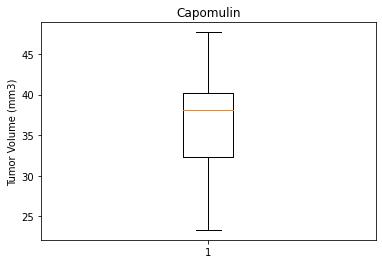

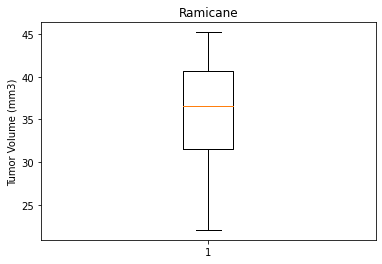

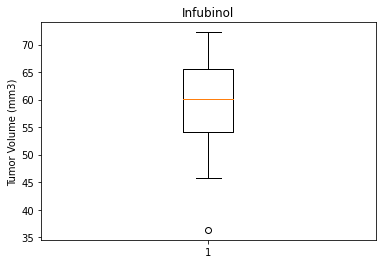

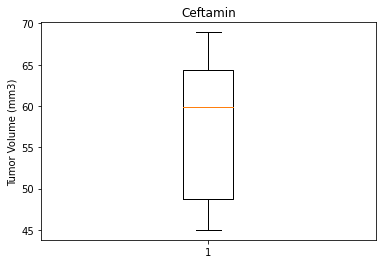

In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

for drug in drugs:
    fig1, ax1 = plt.subplots()
    ax1.set_title(drug)
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(study_timepoint[study_timepoint['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
    plt.show()

## Line and Scatter Plots

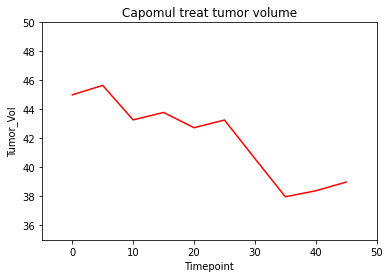

In [155]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#chose mouse ID: b128
Timepoint=[0,5,10,15,20,25,30,35,40,45]
Tumor_Vol=[45,45.65133131,43.2708519,43.78489343,42.731552,43.26214483,40.60533486,37.96764437,38.3797259,38.98287774]
# Plot the charts and apply some styling
Capomul_data, = plt.plot(Timepoint, Tumor_Vol, color="red")

# Add labels to X and Y axes :: Add title
plt.title("Capomul treat tumor volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor_Vol")

plt.xlim(-5,50)
plt.ylim(35,50)

plt.show()



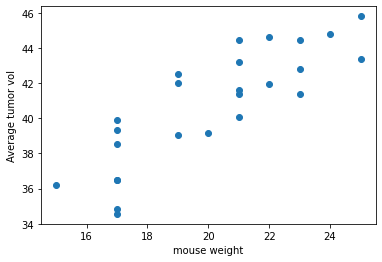

In [149]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomul_study=Merge_mouse_data[Merge_mouse_data['Drug Regimen']=='Capomulin']

#average Tumor Volume
Average_tumor_Vol=capomul_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#mouse_weight
mouse_weight=capomul_study.groupby("Mouse ID")["Weight (g)"].mean()

x_values = mouse_weight
y_values = Average_tumor_Vol
plt.scatter(x_values,y_values)
plt.xlabel('mouse weight')
plt.ylabel('Average tumor vol')
plt.show()


## Correlation and Regression

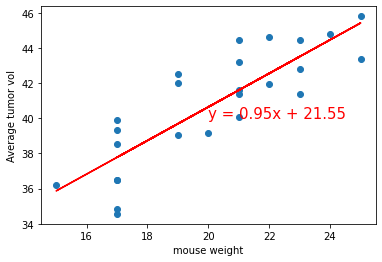

In [151]:
# Calculate the correlation coefficient and linear regression model 

# Add the linear regression equation and line to plot
x_values = mouse_weight
y_values = Average_tumor_Vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('mouse weight')
plt.ylabel('Average tumor vol')
plt.show()

In [ ]:
#observations:
# 1.Tumor volumne is reduced after capomulin treatment， zoniferol does not have a role to inhibit tumor growth.
# 2.There is no outliers in the final tumor volume for all four treatment regimens.
# 3.The contribution of male and female mice in the study seems like equal.
